# "Artificial Neural Networks from Scratch"
> "Python implementation of ANN from scratch"

- toc: true
- comments: true
- image: images/ANNscratch.png
- categories: [project]
- tags: [Python, Numpy, Pandas]
- badges: true
- twitter_large_image: true
- featured: false

## Intro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline 

In [2]:
df = pd.read_csv('data_banknote_authentication.txt',names=['VAR', 'SKEW', 'Curt', 'Entropy', 'Class'])


In [3]:
df.head()


VAR    SKEW    Curt  Entropy  Class
0  3.62160  8.6661 -2.8073 -0.44699      0
1  4.54590  8.1674 -2.4586 -1.46210      0
2  3.86600 -2.6383  1.9242  0.10645      0
3  3.45660  9.5228 -4.0112 -3.59440      0
4  0.32924 -4.4552  4.5718 -0.98880      0

In [4]:
data = np.array(df)
print("Input Data shape: ", data.shape)
print("\n",data)

Input Data shape:  (1372, 5)

 [[  3.6216    8.6661   -2.8073   -0.44699   0.     ]
 [  4.5459    8.1674   -2.4586   -1.4621    0.     ]
 [  3.866    -2.6383    1.9242    0.10645   0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]


In [5]:
X=data[:, :4].T
Y = data[:, 4, None].T
n_x, m = X.shape
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (4, 1372)
Y shape:  (1, 1372)


In [6]:
n_h = 5
n_y = 1

## Simple One Hidden Layer Neural Network

In [7]:
def initialize_params(n_x, n_h, n_y):
    params = {}
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) *0.01
    b2 = np.zeros((n_y, 1))

    params = {"W1":W1,
              "b1": b1,
              "W2": W2, 
              "b2": b2}

    return params

In [8]:
parameters = initialize_params(n_x , n_h , n_y)
parameters

{'W1': array([[ 0.01624345, -0.00611756, -0.00528172, -0.01072969],
        [ 0.00865408, -0.02301539,  0.01744812, -0.00761207],
        [ 0.00319039, -0.0024937 ,  0.01462108, -0.02060141],
        [-0.00322417, -0.00384054,  0.01133769, -0.01099891],
        [-0.00172428, -0.00877858,  0.00042214,  0.00582815]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.01100619,  0.01144724,  0.00901591,  0.00502494,  0.00900856]]),
 'b2': array([[0.]])}

In [9]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [10]:
# def relu(Z):
#     return np.maximum(0, Z)

In [11]:
# def tanh(Z):
#     a = (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
#     return a

In [12]:
def forward_propagation_one(X, params):

    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]

    Z1 = np.dot(W1, X)+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1)+b2
    A2 = sigmoid(Z2)

    forward_cache = {"X": X, "Z1":Z1, "A1": A1, "Z2":Z2, "A2": A2}

    return A2, forward_cache

In [13]:
A2, forward_cache = forward_propagation_one(X, parameters)
A2.shape

(1, 1372)

In [14]:
def compute_cost(A, Y):

    m = Y.shape[1]
    
    cost = -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))

    return cost

In [15]:
original_cost = compute_cost(A2, Y)
print("Original cost without any gradient descent applied: {}".format(original_cost))

Original cost without any gradient descent applied: 0.6936561936241545


In [16]:
def sigmoid_derivative(A):
    
    return A * (1 - A)

In [17]:
# def relu_derivative(A):

#     A = np.where(A <= 0, 0, 1)
#     return A

In [18]:
# def tanh_derivative(A):

#     return 1 - (A ** 2)

In [19]:
def backward_propagation_one(A2, Y, params, forward_cache):
    
    grads = {}
    X, Z1, A1, Z2 = forward_cache["X"], forward_cache["Z1"], forward_cache["A1"], forward_cache["Z2"]
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]

    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)

    grads = {"dW1":dW1,
             "db1": db1,
             "dW2": dW2, 
             "db2": db2}

    return grads

In [20]:
backward_grads = backward_propagation_one(A2, Y, parameters, forward_cache)
backward_grads

{'dW1': array([[-2.88313234e-03, -3.87116314e-03,  6.90812050e-04,
          1.23696535e-04],
        [ 2.97036366e-03,  3.94953380e-03, -6.59826628e-04,
         -1.25878222e-04],
        [ 2.35902234e-03,  3.16138365e-03, -5.55768522e-04,
         -1.02218035e-04],
        [ 1.31502617e-03,  1.76250744e-03, -3.09975034e-04,
         -5.69410563e-05],
        [ 2.35901150e-03,  3.16104986e-03, -5.62605759e-04,
         -9.93837710e-05]]),
 'db1': array([[-1.60439799e-04],
        [ 1.68086092e-04],
        [ 1.32150608e-04],
        [ 7.36549191e-05],
        [ 1.30971446e-04]]),
 'dW2': array([[0.03172731, 0.02240537, 0.02844887, 0.02639144, 0.02554081]]),
 'db2': array([[0.05834027]])}

In [21]:
def update_params(grads, params, learning_rate):

    parameters = params.copy()
    L = len(grads)//2
    for i in range(L):
        parameters["W"+str(i+1)] = parameters["W"+str(i+1)] - learning_rate * grads["dW"+str(i+1)]
        parameters["b"+str(i+1)] = parameters["b"+str(i+1)] - learning_rate * grads["db"+str(i+1)]

    return parameters

In [22]:
updated_parameters = update_params(backward_grads, parameters, 0.01)
updated_parameters

{'W1': array([[ 0.01627228, -0.00607885, -0.00528863, -0.01073092],
        [ 0.00862437, -0.02305488,  0.01745472, -0.00761081],
        [ 0.0031668 , -0.00252532,  0.01462664, -0.02060038],
        [-0.00323732, -0.00385817,  0.01134079, -0.01099834],
        [-0.00174787, -0.00881019,  0.00042776,  0.00582915]]),
 'b1': array([[ 1.60439799e-06],
        [-1.68086092e-06],
        [-1.32150608e-06],
        [-7.36549191e-07],
        [-1.30971446e-06]]),
 'W2': array([[-0.01132346,  0.01122318,  0.00873142,  0.00476103,  0.00875315]]),
 'b2': array([[-0.0005834]])}

In [23]:
A2_second, second_foward_cache = forward_propagation_one(X, updated_parameters)
first_cost = compute_cost(A2_second, Y)
print("First cost with gradient descent applied: {}".format(first_cost))

First cost with gradient descent applied: 0.6935848435446771


In [24]:
A2_1 = np.where(A2_second<0.5, 0, 1)
first_accuracy = np.mean(A2_1 == Y)
print("First accuracy of 1 hidden layer of 5 nodes and 1 iteration is: {}".format(first_accuracy))

First accuracy of 1 hidden layer of 5 nodes and 1 iteration is: 0.4446064139941691


In [25]:
def forward_propagation(A_previous, W, b):

    Z = np.dot(W, A_previous) + b
    A = sigmoid(Z)

    forward_cache = (A_previous,Z)

    return A, forward_cache

In [26]:
def forward_propagation_for_accuracy(X, parameters):

    L = len(parameters)//2
    caches = []
    A = X
    
    for i in range(L):
        A_previous = A
        A, forward_cache = forward_propagation(A_previous, parameters["W"+str(i+1)], parameters["b"+str(i+1)])
        caches.append(forward_cache)

    return A, caches

In [27]:
def compute_accuracy(X, Y, parameters):
    
    A, caches = forward_propagation_for_accuracy(X, parameters)
    A = np.where(A<0.5, 0, 1)
    acc = np.mean(A == Y)

    return acc

In [28]:
def plot_cost(costs, accuracy, learning_rate, epochs):

    plt.figure(figsize = (6,6))
    plt.plot(np.squeeze(costs), label = "Costs")
    plt.plot(np.squeeze(accuracy), label = "Accuracy")
    plt.ylabel('Cost')
    plt.xlabel('Epochs in hundreds')
    plt.title("Learning rate = " + str(learning_rate) + " & Epochs = " + str(epochs))
    plt.legend()
    plt.show()

In [29]:
def one_layer_model(X, Y, n_x, n_h, n_y, learning_rate, epochs):

    parameters = initialize_params( n_x, n_h, n_y)
    costs = []
    accuracy = []

    print("Number of Epochs: ", epochs)
    print("Learning rate: ", learning_rate)
    print("*"*60)

    t0 = time.time()

    for i in range(epochs):
    
        A2, forward_cache = forward_propagation_one(X, parameters)
        
        cost = compute_cost(A2, Y)

        grads = backward_propagation_one(A2, Y, parameters, forward_cache)
        
        parameters = update_params(grads, parameters, learning_rate)

        if i%100 == 0:
            costs.append(cost)
            accuracy.append(compute_accuracy(X, Y, parameters))
            print("Cost after epoch {}: {}".format(i, cost))
    
    t1 = time.time()
    print("*"*60)
    print("Elapsed time for the training is: ",t1-t0)

    A, forward_cache = forward_propagation_one(X, parameters)
    A = np.where(A<0.5, 0, 1)
    final_accuracy = np.mean(A == Y)
    print("Final Accuracy is: {}%".format(final_accuracy * 100))

    return parameters, costs, accuracy

Number of Epochs:  3000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.6936561936241545
Cost after epoch 100: 0.6891555181919499
Cost after epoch 200: 0.6866492737315638
Cost after epoch 300: 0.6838653133393823
Cost after epoch 400: 0.6798017279749253
Cost after epoch 500: 0.6739129093087606
Cost after epoch 600: 0.6659338773113268
Cost after epoch 700: 0.6556749850152902
Cost after epoch 800: 0.6428892041228172
Cost after epoch 900: 0.6272622327631806
Cost after epoch 1000: 0.6085179665347298
Cost after epoch 1100: 0.586596356299132
Cost after epoch 1200: 0.5617766804997283
Cost after epoch 1300: 0.5346197507727908
Cost after epoch 1400: 0.505791628655597
Cost after epoch 1500: 0.4759732474312634
Cost after epoch 1600: 0.445881389049259
Cost after epoch 1700: 0.41626750777009314
Cost after epoch 1800: 0.38782285706643393
Cost after epoch 1900: 0.36106483902197867
Cost after epoch 2000: 0.3362943928846887
Cost after epoch 2100: 0

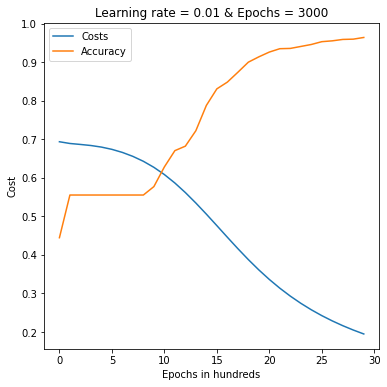

In [30]:
parameters, costs, accuracy = one_layer_model(X, Y, 4, 5, 1, 0.01, 3000)
plot_cost(costs, accuracy, 0.01, 3000)

Number of Epochs:  3000
Learning rate:  0.03
************************************************************
Cost after epoch 0: 0.6936561936241545
Cost after epoch 100: 0.6838918394741097
Cost after epoch 200: 0.6660965331994124
Cost after epoch 300: 0.6276890856603726
Cost after epoch 400: 0.5625969262112488
Cost after epoch 500: 0.4770645608418843
Cost after epoch 600: 0.3889177534055111
Cost after epoch 700: 0.3145001709889604
Cost after epoch 800: 0.25821846884460986
Cost after epoch 900: 0.21674100533173474
Cost after epoch 1000: 0.185805854165944
Cost after epoch 1100: 0.1621840063716397
Cost after epoch 1200: 0.14370110645756085
Cost after epoch 1300: 0.12892114740910587
Cost after epoch 1400: 0.11688162700916178
Cost after epoch 1500: 0.1069201532807768
Cost after epoch 1600: 0.09856781120696335
Cost after epoch 1700: 0.09148391767868663
Cost after epoch 1800: 0.08541531166519473
Cost after epoch 1900: 0.08017020387369028
Cost after epoch 2000: 0.07560086297166557
Cost after epoc

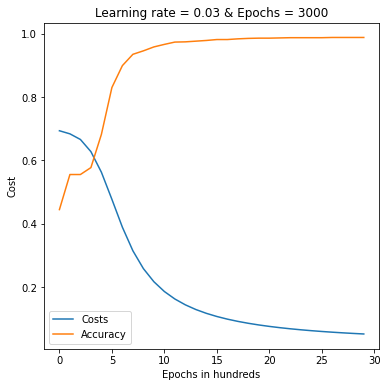

In [31]:
parameters, costs, accuracy = one_layer_model(X, Y, 4, 5, 1, 0.03, 3000)
plot_cost(costs, accuracy, 0.03, 3000)

## Two Hidden Layers Model

In [32]:
def initialize_parameters_two(layers_dims):

    params = {}
    np.random.seed(1)

    n_x, n_h_1, n_h_2, n_y = layers_dims[0], layers_dims[1], layers_dims[2], layers_dims[3]

    W1 = np.random.randn(n_h_1, n_x)  
    b1 = np.zeros((n_h_1, 1))
    W2 = np.random.randn(n_h_2, n_h_1)  
    b2 = np.zeros((n_h_2, 1))
    W3 = np.random.randn(n_y, n_h_2) 
    b3 = np.zeros((n_y, 1))

    params = {"W1":W1,
              "b1": b1,
              "W2": W2, 
              "b2": b2,
              "W3": W3, 
              "b3": b3}

    return params

In [33]:
def forward_propagation_two(X, params):

    W1, b1, W2, b2, W3, b3 = params["W1"], params["b1"], params["W2"], params["b2"], params["W3"], params["b3"]

    Z1 = np.dot(W1, X)+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1)+b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3, A2)+b3
    A3 = sigmoid(Z3)

    forward_cache = {"X": X, "Z1":Z1, "A1": A1, "Z2":Z2, "A2": A2, "Z3":Z3, "A3": A3}

    return A3, forward_cache

In [34]:
def backward_propagation_two(A3, Y, params, forward_cache):
    
    grads = {}
    X, Z1, A1, Z2, A2, Z3 = forward_cache["X"], forward_cache["Z1"], forward_cache["A1"], forward_cache["Z2"], forward_cache["A2"], forward_cache["Z3"]
    W1, b1, W2, b2, W3, b3 = params["W1"], params["b1"], params["W2"], params["b2"], params["W3"], params["b3"]


    dZ3 = A3 - Y
    dW3 = (1/m) * np.matmul(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis = 1, keepdims = True)
    dZ2 = np.dot(W3.T, dZ3) * sigmoid_derivative(A2)
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2, 
             "db2": db2, 
             "dW3": dW3, 
             "db3": db3}

    return grads

In [35]:
def two_layers_model(X, Y, layers_dims, learning_rate, epochs):

    parameters = initialize_parameters_two(layers_dims)
    costs = []
    accuracy = []

    print("Number of Epochs: ", epochs)
    print("Learning rate: ", learning_rate)
    print("*"*60)

    t0 = time.time()

    for i in range(epochs):
    
        A3, forward_cache = forward_propagation_two(X, parameters)
        
        cost = compute_cost(A3, Y)

        grads = backward_propagation_two(A3, Y, parameters, forward_cache)
        
        parameters = update_params(grads, parameters, learning_rate)

        if i%100 == 0:
            costs.append(cost)
            accuracy.append(compute_accuracy(X, Y, parameters))
            print("Cost after epoch {}: {}".format(i, cost))
    
    t1 = time.time()
    print("*"*60)
    print("Elapsed time for the training is: ",t1-t0)

    A, forward_cache = forward_propagation_two(X, parameters)
    A = np.where(A<0.5, 0, 1)
    final_accuracy = np.mean(A == Y)
    print("Final Accuracy is: {}%".format(final_accuracy * 100))

    return parameters, costs, accuracy

Number of Epochs:  1000
Learning rate:  0.1
************************************************************
Cost after epoch 0: 0.7341785722422635
Cost after epoch 100: 0.41804578793955455
Cost after epoch 200: 0.2536391786541635
Cost after epoch 300: 0.16290432223978138
Cost after epoch 400: 0.11279678574236231
Cost after epoch 500: 0.08323844123812278
Cost after epoch 600: 0.06457896658075797
Cost after epoch 700: 0.052136034022113295
Cost after epoch 800: 0.043416750318197556
Cost after epoch 900: 0.03703813172349534
************************************************************
Elapsed time for the training is:  0.627739667892456
Final Accuracy is: 100.0%


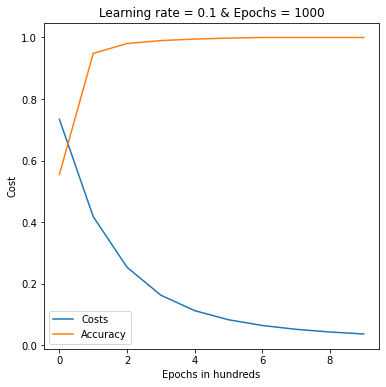

In [36]:
parameters, costs, accuracy = two_layers_model(X, Y, [4, 10, 7, 1], 0.1, 1000)
plot_cost(costs, accuracy, 0.1, 1000)

Number of Epochs:  3000
Learning rate:  0.1
************************************************************
Cost after epoch 0: 0.7341785722422635
Cost after epoch 100: 0.41804578793955455
Cost after epoch 200: 0.2536391786541635
Cost after epoch 300: 0.16290432223978138
Cost after epoch 400: 0.11279678574236231
Cost after epoch 500: 0.08323844123812278
Cost after epoch 600: 0.06457896658075797
Cost after epoch 700: 0.052136034022113295
Cost after epoch 800: 0.043416750318197556
Cost after epoch 900: 0.03703813172349534
Cost after epoch 1000: 0.03219981750232199
Cost after epoch 1100: 0.028416353655911594
Cost after epoch 1200: 0.025381552493223308
Cost after epoch 1300: 0.022895358739410857
Cost after epoch 1400: 0.020822521811838596
Cost after epoch 1500: 0.019068650831998296
Cost after epoch 1600: 0.017565983792854387
Cost after epoch 1700: 0.016264668499844603
Cost after epoch 1800: 0.015127245424454061
Cost after epoch 1900: 0.014125045039189883
Cost after epoch 2000: 0.0132357649849

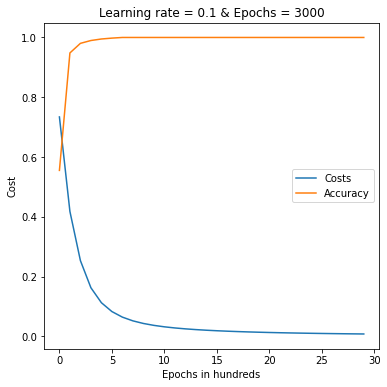

In [37]:
parameters, costs, accuracy = two_layers_model(X, Y, [4, 10, 7, 1], 0.1, 3000)
plot_cost(costs, accuracy, 0.1, 3000)

Number of Epochs:  3000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.7341785722422635
Cost after epoch 100: 0.6448888232661
Cost after epoch 200: 0.6114811485661837
Cost after epoch 300: 0.5847225602795906
Cost after epoch 400: 0.5588626928791727
Cost after epoch 500: 0.5335677344762613
Cost after epoch 600: 0.5089708164192742
Cost after epoch 700: 0.48505167154379625
Cost after epoch 800: 0.4618171132294425
Cost after epoch 900: 0.4393419700101513
Cost after epoch 1000: 0.4177176985964929
Cost after epoch 1100: 0.39701800421541655
Cost after epoch 1200: 0.37728840155940685
Cost after epoch 1300: 0.35854748241173423
Cost after epoch 1400: 0.34079258995630013
Cost after epoch 1500: 0.32400626700339125
Cost after epoch 1600: 0.3081611395301733
Cost after epoch 1700: 0.293222596857308
Cost after epoch 1800: 0.2791504742670355
Cost after epoch 1900: 0.2659010708383662
Cost after epoch 2000: 0.25342954064712714
Cost after epoch 2100

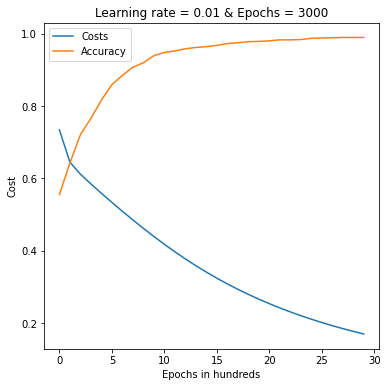

In [38]:
parameters, costs, accuracy = two_layers_model(X, Y, [4, 10, 7, 1], 0.01, 3000)
plot_cost(costs, accuracy, 0.01, 3000)

Number of Epochs:  3000
Learning rate:  0.001
************************************************************
Cost after epoch 0: 0.7341785722422635
Cost after epoch 100: 0.7181573572658664
Cost after epoch 200: 0.7045395939645949
Cost after epoch 300: 0.692934113784307
Cost after epoch 400: 0.6829996793798759
Cost after epoch 500: 0.6744435445037069
Cost after epoch 600: 0.6670179485990474
Cost after epoch 700: 0.6605154980174369
Cost after epoch 800: 0.6547641264553529
Cost after epoch 900: 0.6496220969495591
Cost after epoch 1000: 0.6449733253699992
Cost after epoch 1100: 0.6407231724115118
Cost after epoch 1200: 0.636794760853255
Cost after epoch 1300: 0.633125817841701
Cost after epoch 1400: 0.6296660089538582
Cost after epoch 1500: 0.6263747141522169
Cost after epoch 1600: 0.6232191896260346
Cost after epoch 1700: 0.6201730597628327
Cost after epoch 1800: 0.6172150872803299
Cost after epoch 1900: 0.6143281750350491
Cost after epoch 2000: 0.6114985590719386
Cost after epoch 2100: 0.6

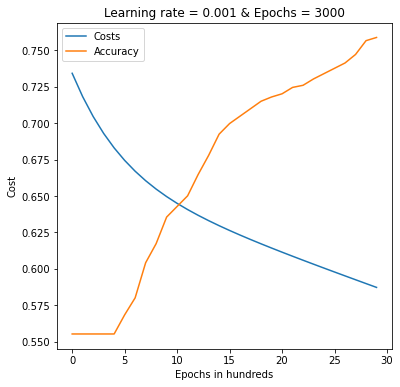

In [39]:
parameters, costs, accuracy = two_layers_model(X, Y, [4, 10, 7, 1], 0.001, 3000)
plot_cost(costs, accuracy, 0.001, 3000)

Number of Epochs:  6000
Learning rate:  0.001
************************************************************
Cost after epoch 0: 0.7341785722422635
Cost after epoch 100: 0.7181573572658664
Cost after epoch 200: 0.7045395939645949
Cost after epoch 300: 0.692934113784307
Cost after epoch 400: 0.6829996793798759
Cost after epoch 500: 0.6744435445037069
Cost after epoch 600: 0.6670179485990474
Cost after epoch 700: 0.6605154980174369
Cost after epoch 800: 0.6547641264553529
Cost after epoch 900: 0.6496220969495591
Cost after epoch 1000: 0.6449733253699992
Cost after epoch 1100: 0.6407231724115118
Cost after epoch 1200: 0.636794760853255
Cost after epoch 1300: 0.633125817841701
Cost after epoch 1400: 0.6296660089538582
Cost after epoch 1500: 0.6263747141522169
Cost after epoch 1600: 0.6232191896260346
Cost after epoch 1700: 0.6201730597628327
Cost after epoch 1800: 0.6172150872803299
Cost after epoch 1900: 0.6143281750350491
Cost after epoch 2000: 0.6114985590719386
Cost after epoch 2100: 0.6

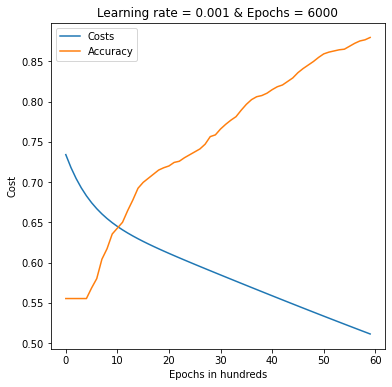

In [40]:
parameters, costs, accuracy = two_layers_model(X, Y, [4, 10, 7, 1], 0.001, 6000)
plot_cost(costs, accuracy, 0.001, 6000)

## L Layer Model

In [41]:
def initialize_parameters_L(layers_dims):

    parameters = {}
    np.random.seed(1)

    L = len(layers_dims)

    for i in range(1, L):
        parameters["W"+str(i)] = np.random.randn(layers_dims[i], layers_dims[i-1]) 
        parameters["b"+str(i)] = np.zeros((layers_dims[i], 1))


    return parameters

In [42]:
def forward_propagation_L(X, parameters):

    L = len(parameters)//2
    caches = []
    A = X
    
    for i in range(L):
        A_previous = A
        A, forward_cache = forward_propagation(A_previous, parameters["W"+str(i+1)], parameters["b"+str(i+1)])
        caches.append(forward_cache)

    return A, caches

In [43]:
def backward_propagation_L(A, Y, parameters, caches):
    
    grads = {}
    L = len(parameters)//2       

    dA = -(Y/A) + ((1-Y)/(1-A))  
    dZ = A - Y
    

    for i in reversed(range(L)):
        current_cache = caches[i]     
        A, Z = current_cache          
        grads["dW"+str(i+1)] = (1/m)*np.dot(dZ, A.T) 
        grads["db"+str(i+1)] = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
        grads["dZ"+str(i)] = np.dot(parameters["W"+str(i+1)].T, dZ) * sigmoid_derivative(A)
        dZ = grads["dZ"+str(i)]


    return grads

In [44]:
def update_params_L(grads, params, learning_rate):

    parameters = params.copy()
    L = len(parameters)//2
    for i in range(L):
        parameters["W"+str(i+1)] = parameters["W"+str(i+1)] - learning_rate * grads["dW"+str(i+1)]
        parameters["b"+str(i+1)] = parameters["b"+str(i+1)] - learning_rate * grads["db"+str(i+1)]

    return parameters

In [45]:
def L_layers_model(X, Y, layers_dims, learning_rate, epochs):

    parameters = initialize_parameters_L(layers_dims)
    costs = []
    accuracy = []

    print("Number of Epochs: ", epochs)
    print("Learning rate: ", learning_rate)
    print("*"*60)

    t0 = time.time()

    for i in range(epochs):
    
        A, caches = forward_propagation_L(X, parameters)
        # print("Number of Caches",len(caches))
        # for i, cache in enumerate(caches):
        #     print("Cache {} has shape {} : {}".format(i, cache[0].shape, cache[0]))
        #     print("Cache {} has shape {} : {}".format(i, cache[1].shape, cache[1]))

        cost = compute_cost(A, Y)

        grads = backward_propagation_L(A, Y, parameters, caches)
        
        parameters = update_params_L(grads, parameters, learning_rate)

        if i%100 == 0:
            costs.append(cost)
            accuracy.append(compute_accuracy(X, Y, parameters))
            print("Cost after epoch {}: {}".format(i, cost))
    
    t1 = time.time()
    print("*"*60)
    print("Elapsed time for the training is: ",t1-t0)

    
    final_accuracy = compute_accuracy(X, Y, parameters)
    print("Final Accuracy is: {}%".format(final_accuracy * 100))

    return parameters, costs, accuracy

Number of Epochs:  1000
Learning rate:  0.001
************************************************************
Cost after epoch 0: 0.9058177931945443
Cost after epoch 100: 0.8787549041993477
Cost after epoch 200: 0.8547431740102313
Cost after epoch 300: 0.8335061181210778
Cost after epoch 400: 0.8147756769903448
Cost after epoch 500: 0.7982963780085447
Cost after epoch 600: 0.7838282813510609
Cost after epoch 700: 0.7711488366590706
Cost after epoch 800: 0.7600538178984678
Cost after epoch 900: 0.7503575176048662
************************************************************
Elapsed time for the training is:  0.6054956912994385
Final Accuracy is: 44.460641399416915%


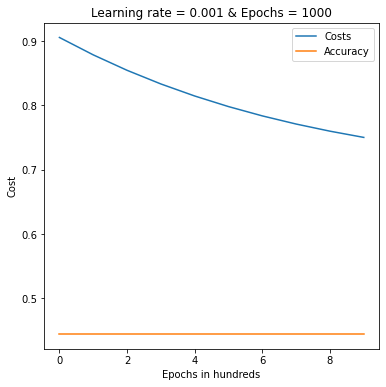

In [46]:
parameters, costs, accuracy = L_layers_model(X, Y, [4, 10, 7, 5, 1], 0.001, 1000)
plot_cost(costs,accuracy, 0.001, 1000)

Number of Epochs:  5000
Learning rate:  0.001
************************************************************
Cost after epoch 0: 0.9058177931945443
Cost after epoch 100: 0.8787549041993477
Cost after epoch 200: 0.8547431740102313
Cost after epoch 300: 0.8335061181210778
Cost after epoch 400: 0.8147756769903448
Cost after epoch 500: 0.7982963780085447
Cost after epoch 600: 0.7838282813510609
Cost after epoch 700: 0.7711488366590706
Cost after epoch 800: 0.7600538178984678
Cost after epoch 900: 0.7503575176048662
Cost after epoch 1000: 0.7418923764005263
Cost after epoch 1100: 0.7345082062697952
Cost after epoch 1200: 0.7280711424976305
Cost after epoch 1300: 0.7224624337600349
Cost after epoch 1400: 0.7175771554681254
Cost after epoch 1500: 0.7133229097438804
Cost after epoch 1600: 0.7096185570737341
Cost after epoch 1700: 0.7063930098693144
Cost after epoch 1800: 0.7035841066250511
Cost after epoch 1900: 0.7011375766798135
Cost after epoch 2000: 0.6990060992804858
Cost after epoch 2100: 

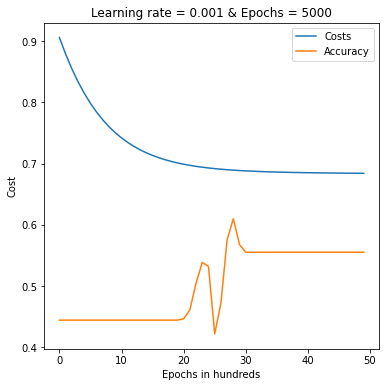

In [47]:
parameters, costs, accuracy = L_layers_model(X, Y, [4, 10, 7, 5, 1], 0.001, 5000)
plot_cost(costs,accuracy, 0.001, 5000)

Number of Epochs:  20000
Learning rate:  0.001
************************************************************
Cost after epoch 0: 0.9058177931945443
Cost after epoch 100: 0.8787549041993477
Cost after epoch 200: 0.8547431740102313
Cost after epoch 300: 0.8335061181210778
Cost after epoch 400: 0.8147756769903448
Cost after epoch 500: 0.7982963780085447
Cost after epoch 600: 0.7838282813510609
Cost after epoch 700: 0.7711488366590706
Cost after epoch 800: 0.7600538178984678
Cost after epoch 900: 0.7503575176048662
Cost after epoch 1000: 0.7418923764005263
Cost after epoch 1100: 0.7345082062697952
Cost after epoch 1200: 0.7280711424976305
Cost after epoch 1300: 0.7224624337600349
Cost after epoch 1400: 0.7175771554681254
Cost after epoch 1500: 0.7133229097438804
Cost after epoch 1600: 0.7096185570737341
Cost after epoch 1700: 0.7063930098693144
Cost after epoch 1800: 0.7035841066250511
Cost after epoch 1900: 0.7011375766798135
Cost after epoch 2000: 0.6990060992804858
Cost after epoch 2100:

Cost after epoch 19200: 0.6748028532118195
Cost after epoch 19300: 0.6746929805722235
Cost after epoch 19400: 0.6745819884375189
Cost after epoch 19500: 0.6744698616971845
Cost after epoch 19600: 0.6743565850358942
Cost after epoch 19700: 0.6742421429309623
Cost after epoch 19800: 0.6741265196497771
Cost after epoch 19900: 0.6740096992472298
************************************************************
Elapsed time for the training is:  12.11003589630127
Final Accuracy is: 55.539358600583085%


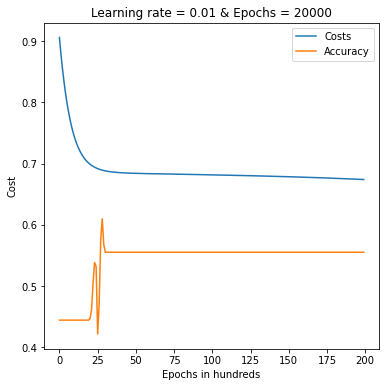

In [48]:
parameters, costs, accuracy = L_layers_model(X, Y, [4, 10, 7, 5, 1], 0.001, 20000)
plot_cost(costs, accuracy, 0.01, 20000)

Number of Epochs:  5000
Learning rate:  0.1
************************************************************
Cost after epoch 0: 0.9058177931945443
Cost after epoch 100: 0.6816320197542468
Cost after epoch 200: 0.673909212592033
Cost after epoch 300: 0.6522069285568555
Cost after epoch 400: 0.5888618892479032
Cost after epoch 500: 0.4518685625192162
Cost after epoch 600: 0.2796741364147254
Cost after epoch 700: 0.17375741377744647
Cost after epoch 800: 0.11627097451049986
Cost after epoch 900: 0.0837217346892617
Cost after epoch 1000: 0.06373891836540552
Cost after epoch 1100: 0.05061540002131189
Cost after epoch 1200: 0.04151712268665393
Cost after epoch 1300: 0.03492354485515207
Cost after epoch 1400: 0.02996877096079197
Cost after epoch 1500: 0.026133143562655503
Cost after epoch 1600: 0.023089940323251044
Cost after epoch 1700: 0.02062527182878535
Cost after epoch 1800: 0.018594153921656975
Cost after epoch 1900: 0.01689531047598496
Cost after epoch 2000: 0.015456125670167534
Cost afte

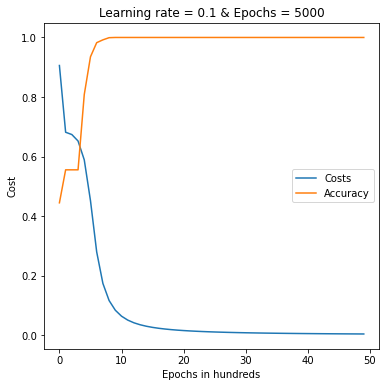

Number of Epochs:  5000
Learning rate:  0.03
************************************************************
Cost after epoch 0: 0.9058177931945443
Cost after epoch 100: 0.6879902811137586
Cost after epoch 200: 0.6835155306434567
Cost after epoch 300: 0.6821292731141158
Cost after epoch 400: 0.6805452381945335
Cost after epoch 500: 0.6785802955136799
Cost after epoch 600: 0.6760421519357027
Cost after epoch 700: 0.6726478806428381
Cost after epoch 800: 0.6679750742153945
Cost after epoch 900: 0.6614052754606485
Cost after epoch 1000: 0.6520883792458579
Cost after epoch 1100: 0.6389878433969111
Cost after epoch 1200: 0.6210541883975376
Cost after epoch 1300: 0.597506712489762
Cost after epoch 1400: 0.5678928862044584
Cost after epoch 1500: 0.531431556110068
Cost after epoch 1600: 0.4865337607706746
Cost after epoch 1700: 0.4304955272318302
Cost after epoch 1800: 0.37394067943288956
Cost after epoch 1900: 0.32340325525249114
Cost after epoch 2000: 0.2786212125398061
Cost after epoch 2100: 0

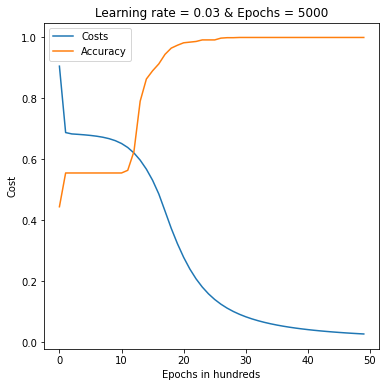

Number of Epochs:  5000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.9058177931945443
Cost after epoch 100: 0.7416651940612006
Cost after epoch 200: 0.6988895558535142
Cost after epoch 300: 0.6880868594940236
Cost after epoch 400: 0.6851264494668848
Cost after epoch 500: 0.6840887630183584
Cost after epoch 600: 0.6835192452830169
Cost after epoch 700: 0.6830541932575773
Cost after epoch 800: 0.6825998950578858
Cost after epoch 900: 0.6821299747718844
Cost after epoch 1000: 0.6816347270113869
Cost after epoch 1100: 0.6811083212439397
Cost after epoch 1200: 0.6805455126102614
Cost after epoch 1300: 0.6799407417682292
Cost after epoch 1400: 0.6792878274496066
Cost after epoch 1500: 0.6785797961681013
Cost after epoch 1600: 0.6778087323816884
Cost after epoch 1700: 0.6769656182772041
Cost after epoch 1800: 0.676040154406026
Cost after epoch 1900: 0.6750205586552179
Cost after epoch 2000: 0.6738933438004958
Cost after epoch 2100: 0.

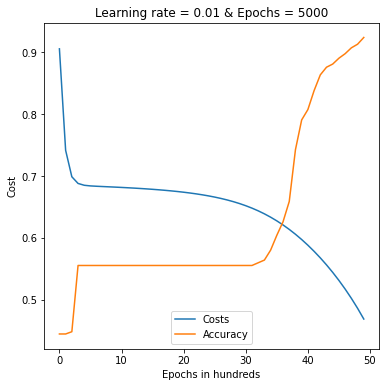

Number of Epochs:  5000
Learning rate:  0.003
************************************************************
Cost after epoch 0: 0.9058177931945443
Cost after epoch 100: 0.8334699800651983
Cost after epoch 200: 0.7837777772736595
Cost after epoch 300: 0.7503057984067155
Cost after epoch 400: 0.7280247692066603
Cost after epoch 500: 0.7132842873454832
Cost after epoch 600: 0.7035533892115141
Cost after epoch 700: 0.6971247687990673
Cost after epoch 800: 0.6928646943119133
Cost after epoch 900: 0.6900266182032148
Cost after epoch 1000: 0.6881208962122407
Cost after epoch 1100: 0.6868268158800607
Cost after epoch 1200: 0.685934286793592
Cost after epoch 1300: 0.6853055576723719
Cost after epoch 1400: 0.6848501903633627
Cost after epoch 1500: 0.6845087221570676
Cost after epoch 1600: 0.6842419969786256
Cost after epoch 1700: 0.6840241904891875
Cost after epoch 1800: 0.6838382431783625
Cost after epoch 1900: 0.6836728652306202
Cost after epoch 2000: 0.6835205690864843
Cost after epoch 2100: 0

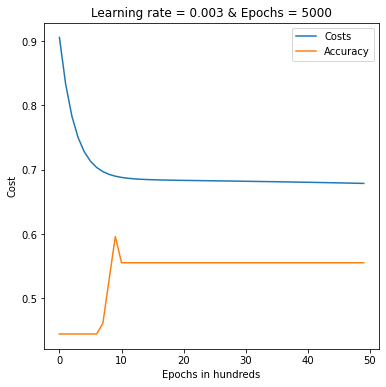

Number of Epochs:  5000
Learning rate:  0.001
************************************************************
Cost after epoch 0: 0.9058177931945443
Cost after epoch 100: 0.8787549041993477
Cost after epoch 200: 0.8547431740102313
Cost after epoch 300: 0.8335061181210778
Cost after epoch 400: 0.8147756769903448
Cost after epoch 500: 0.7982963780085447
Cost after epoch 600: 0.7838282813510609
Cost after epoch 700: 0.7711488366590706
Cost after epoch 800: 0.7600538178984678
Cost after epoch 900: 0.7503575176048662
Cost after epoch 1000: 0.7418923764005263
Cost after epoch 1100: 0.7345082062697952
Cost after epoch 1200: 0.7280711424976305
Cost after epoch 1300: 0.7224624337600349
Cost after epoch 1400: 0.7175771554681254
Cost after epoch 1500: 0.7133229097438804
Cost after epoch 1600: 0.7096185570737341
Cost after epoch 1700: 0.7063930098693144
Cost after epoch 1800: 0.7035841066250511
Cost after epoch 1900: 0.7011375766798135
Cost after epoch 2000: 0.6990060992804858
Cost after epoch 2100: 

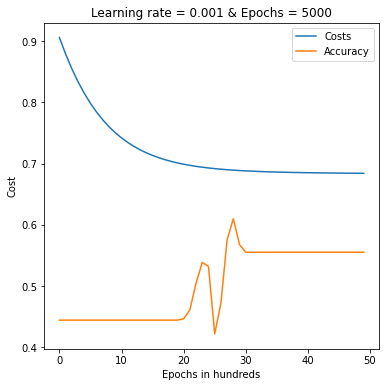

In [49]:
learning_rates = [0.1, 0.03, 0.01, 0.003, 0.001]
for lr in learning_rates:
    parameters, costs, accuracy = L_layers_model(X, Y, [4, 10, 7, 5, 1], lr, 5000)
    plot_cost(costs, accuracy, lr, 5000)

**From the above expermimentation, it seems that the best learning rates are 0.01 & 0.003 that dont overfit the training dataset much**

Number of Epochs:  20000
Learning rate:  0.003
************************************************************
Cost after epoch 0: 0.9058177931945443
Cost after epoch 100: 0.8334699800651983
Cost after epoch 200: 0.7837777772736595
Cost after epoch 300: 0.7503057984067155
Cost after epoch 400: 0.7280247692066603
Cost after epoch 500: 0.7132842873454832
Cost after epoch 600: 0.7035533892115141
Cost after epoch 700: 0.6971247687990673
Cost after epoch 800: 0.6928646943119133
Cost after epoch 900: 0.6900266182032148
Cost after epoch 1000: 0.6881208962122407
Cost after epoch 1100: 0.6868268158800607
Cost after epoch 1200: 0.685934286793592
Cost after epoch 1300: 0.6853055576723719
Cost after epoch 1400: 0.6848501903633627
Cost after epoch 1500: 0.6845087221570676
Cost after epoch 1600: 0.6842419969786256
Cost after epoch 1700: 0.6840241904891875
Cost after epoch 1800: 0.6838382431783625
Cost after epoch 1900: 0.6836728652306202
Cost after epoch 2000: 0.6835205690864843
Cost after epoch 2100: 

Cost after epoch 19300: 0.3088550520789811
Cost after epoch 19400: 0.30428680558853843
Cost after epoch 19500: 0.29978111162985555
Cost after epoch 19600: 0.29533878827536025
Cost after epoch 19700: 0.290960488913185
Cost after epoch 19800: 0.2866467056548412
Cost after epoch 19900: 0.28239777713832287
************************************************************
Elapsed time for the training is:  12.058766841888428
Final Accuracy is: 98.25072886297376%


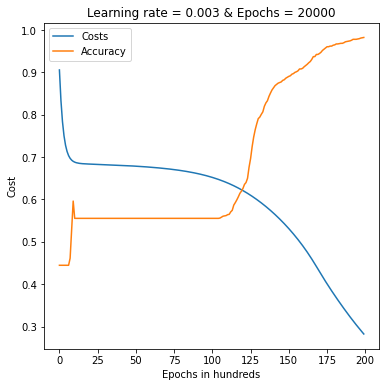

In [50]:
parameters, costs, accuracy = L_layers_model(X, Y, [4, 10, 7, 5, 1], 0.003, 20000)
plot_cost(costs, accuracy, 0.003, 20000)

## Dealing with Overfitting

### 1- Splitting the dataset into training set &amp; test set to check for overfitting

In [51]:
from sklearn.model_selection import train_test_split

Xt = X.T.copy()
Yt = Y.T.copy()

X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, test_size= 0.2)

X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)


X_train shape:  (4, 1097)
Y_train shape:  (1, 1097)
X_test shape:  (4, 275)
Y_test shape:  (1, 275)


Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.8996300046921928
Cost after epoch 100: 0.7589762455800287
Cost after epoch 200: 0.7102639662371708
Cost after epoch 300: 0.6941070271101197
Cost after epoch 400: 0.6886433590145795
Cost after epoch 500: 0.6866513883792047
Cost after epoch 600: 0.6857892458253425
Cost after epoch 700: 0.6852936283946873
Cost after epoch 800: 0.6849132550377014
Cost after epoch 900: 0.6845642039893428
Cost after epoch 1000: 0.6842175688324243
Cost after epoch 1100: 0.6838625512010701
Cost after epoch 1200: 0.6834942634754908
Cost after epoch 1300: 0.6831096749470337
Cost after epoch 1400: 0.6827062510946886
Cost after epoch 1500: 0.6822814841157961
Cost after epoch 1600: 0.6818327171349454
Cost after epoch 1700: 0.6813570633926912
Cost after epoch 1800: 0.6808513540851164
Cost after epoch 1900: 0.6803120924882912
Cost after epoch 2000: 0.6797354066039267
Cost after epoch 2100: 

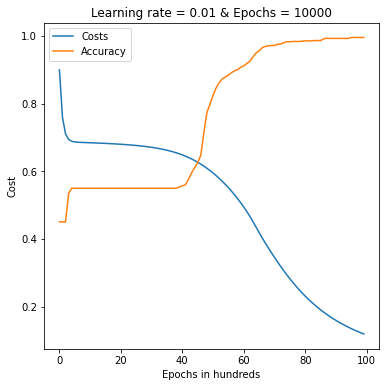

In [52]:
parameters_train, costs_train, accuracy_train = L_layers_model(X_train, Y_train, [4, 10, 7, 5, 1], 0.01, 10000)
plot_cost(costs_train, accuracy_train, 0.01, 10000)

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.9305014440566515
Cost after epoch 100: 0.8714573561543504
Cost after epoch 200: 0.8253897454787105
Cost after epoch 300: 0.7898416011177477
Cost after epoch 400: 0.7626304784124494
Cost after epoch 500: 0.7419153956169339
Cost after epoch 600: 0.7262000246064937
Cost after epoch 700: 0.7142998774103417
Cost after epoch 800: 0.7052944950771561
Cost after epoch 900: 0.6984775975786219
Cost after epoch 1000: 0.6933117990456957
Cost after epoch 1100: 0.6893904190700164
Cost after epoch 1200: 0.6864066858203244
Cost after epoch 1300: 0.6841295901797287
Cost after epoch 1400: 0.6823852937226864
Cost after epoch 1500: 0.6810429778239475
Cost after epoch 1600: 0.6800041508600071
Cost after epoch 1700: 0.6791946033738617
Cost after epoch 1800: 0.6785583696692791
Cost after epoch 1900: 0.6780531999793133
Cost after epoch 2000: 0.6776471656847919
Cost after epoch 2100: 

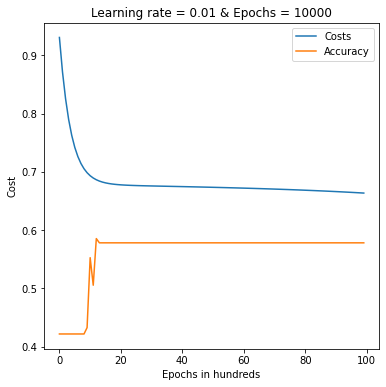

In [53]:
parameters_test, costs_test, accuracy_test = L_layers_model(X_test, Y_test, [4, 10, 7, 5, 1], 0.01, 10000)
plot_cost(costs_test, accuracy_test, 0.01, 10000)

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.7399319745162903
Cost after epoch 100: 0.6924390475741036
Cost after epoch 200: 0.6700828013819284
Cost after epoch 300: 0.6537267508821771
Cost after epoch 400: 0.6390546761445141
Cost after epoch 500: 0.6248785156614701
Cost after epoch 600: 0.6107179612276016
Cost after epoch 700: 0.596293353990341
Cost after epoch 800: 0.5814122974811856
Cost after epoch 900: 0.5659483347068631
Cost after epoch 1000: 0.5498468964910254
Cost after epoch 1100: 0.5331317058859114
Cost after epoch 1200: 0.5158895547492424
Cost after epoch 1300: 0.49823527456240013
Cost after epoch 1400: 0.48028446747839126
Cost after epoch 1500: 0.46214646466454695
Cost after epoch 1600: 0.4439257530836232
Cost after epoch 1700: 0.4257225957806516
Cost after epoch 1800: 0.40763348554361206
Cost after epoch 1900: 0.38975285680518706
Cost after epoch 2000: 0.37217465471278866
Cost after epoch 2

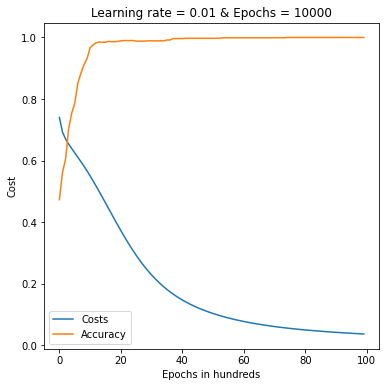

In [54]:
parameters_train, costs_train, accuracy_train = L_layers_model(X_train, Y_train, [4, 10, 6, 1], 0.01, 10000)
plot_cost(costs_train, accuracy_train, 0.01, 10000)

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.7407218996768389
Cost after epoch 100: 0.7195591113379605
Cost after epoch 200: 0.7041275862531886
Cost after epoch 300: 0.6926176067321209
Cost after epoch 400: 0.6837750217324892
Cost after epoch 500: 0.6767431907099846
Cost after epoch 600: 0.6709416156861331
Cost after epoch 700: 0.6659783231887184
Cost after epoch 800: 0.6615887700535014
Cost after epoch 900: 0.6575940835149235
Cost after epoch 1000: 0.6538728384094368
Cost after epoch 1100: 0.6503421021055003
Cost after epoch 1200: 0.6469447451185957
Cost after epoch 1300: 0.6436409588703522
Cost after epoch 1400: 0.640402588358482
Cost after epoch 1500: 0.637209345096768
Cost after epoch 1600: 0.6340462752486352
Cost after epoch 1700: 0.6309020656544869
Cost after epoch 1800: 0.6277679093756127
Cost after epoch 1900: 0.6246367451135316
Cost after epoch 2000: 0.6215027467385508
Cost after epoch 2100: 0.

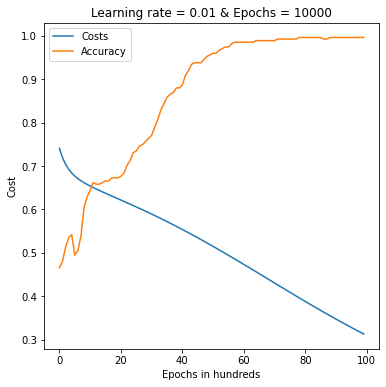

In [55]:
parameters_test, costs_test, accuracy_test = L_layers_model(X_test, Y_test, [4, 10, 6, 1], 0.01, 10000)
plot_cost(costs_test, accuracy_test, 0.01, 10000)

--------------------------

**This last example will be compared to the same model with the same hyperparameters but with dropout applied to see if we will succeed to overcome overfitting of the trainig set**

--------------------------

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.8230434382594065
Cost after epoch 100: 0.7730753314080838
Cost after epoch 200: 0.7484390149364067
Cost after epoch 300: 0.7341418486558031
Cost after epoch 400: 0.7243001641184288
Cost after epoch 500: 0.7165950135072124
Cost after epoch 600: 0.7100529920767523
Cost after epoch 700: 0.7042048149392519
Cost after epoch 800: 0.6987678653171386
Cost after epoch 900: 0.6935275760934737
Cost after epoch 1000: 0.6883072022566008
Cost after epoch 1100: 0.6829987964548083
Cost after epoch 1200: 0.6776235129719038
Cost after epoch 1300: 0.6723233483905824
Cost after epoch 1400: 0.667245199282351
Cost after epoch 1500: 0.6624526531365461
Cost after epoch 1600: 0.6579367142446559
Cost after epoch 1700: 0.6536541082515633
Cost after epoch 1800: 0.6495484892709283
Cost after epoch 1900: 0.6455599482647718
Cost after epoch 2000: 0.6416315044286579
Cost after epoch 2100: 0

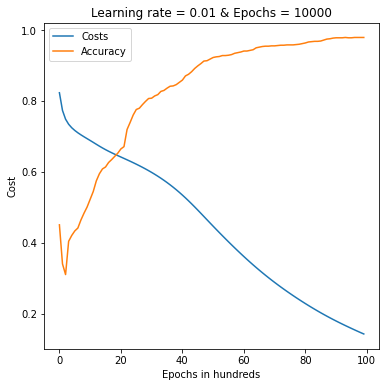

In [56]:
parameters_train, costs_train, accuracy_train = L_layers_model(X_train, Y_train, [4, 4, 5, 1], 0.01, 10000)
plot_cost(costs_train, accuracy_train, 0.01, 10000)

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.8292199627993843
Cost after epoch 100: 0.8091168122635036
Cost after epoch 200: 0.792866843980141
Cost after epoch 300: 0.7796896270652756
Cost after epoch 400: 0.7689525971790507
Cost after epoch 500: 0.7601484853200209
Cost after epoch 600: 0.7528736255368409
Cost after epoch 700: 0.746808535840789
Cost after epoch 800: 0.7417012909040721
Cost after epoch 900: 0.7373536999760733
Cost after epoch 1000: 0.7336100470824676
Cost after epoch 1100: 0.7303480466974648
Cost after epoch 1200: 0.7274716499233467
Cost after epoch 1300: 0.7249053613619677
Cost after epoch 1400: 0.7225897702418947
Cost after epoch 1500: 0.7204780471717971
Cost after epoch 1600: 0.7185332031969469
Cost after epoch 1700: 0.7167259476668785
Cost after epoch 1800: 0.7150330149445682
Cost after epoch 1900: 0.7134358574354823
Cost after epoch 2000: 0.7119196244868686
Cost after epoch 2100: 0.

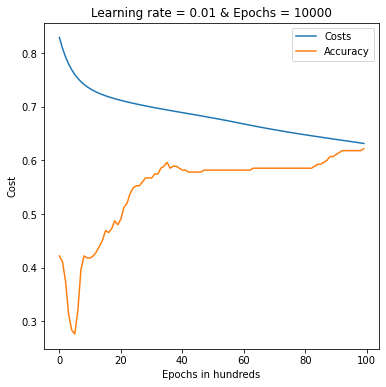

In [57]:
parameters_test, costs_test, accuracy_test = L_layers_model(X_test, Y_test, [4, 4, 5, 1], 0.01, 10000)
plot_cost(costs_test, accuracy_test, 0.01, 10000)

---

**From the above edperimentation, its very obvious that the model is overfitting the training set as the accuracy on it is very high compared to the test set.**

---

### 2- Dropout Regularization

### L Layer Model with Dropout

In [58]:
def forward_propagation_L_dropout(X, parameters, keep_rate):

    L = len(parameters)//2
    caches = []
    A = X
    
    for i, k in zip(range(L), keep_rate):
        A_previous = A

        keep_rate = k
        np.random.seed(1)
        D = np.random.rand(A.shape[0], A.shape[1])
        D = D < keep_rate
        A_previous = A_previous * D
        A_previous = A_previous / keep_rate

        A, forward_cache = forward_propagation(A_previous, parameters["W"+str(i+1)], parameters["b"+str(i+1)])
        caches.append((forward_cache, D))

    return A, caches

In [59]:
def backward_propagation_L_dropout(A, Y, parameters, caches, keep_rate):
    
    grads = {}
    L = len(parameters)//2       

    current_cache = caches[L-1]
    forward_cache, D = current_cache

    dA = -(Y/A) + ((1-Y)/(1-A))
    dZ = A - Y
    

    for i, k in zip(reversed(range(L)), reversed(keep_rate)):
        current_cache = caches[i]
        forward_cache, D = current_cache     
        A, Z = forward_cache
        keep_rate = k

        grads["dW"+str(i+1)] = (1/m)*np.dot(dZ, A.T) 
        grads["db"+str(i+1)] = (1/m)*np.sum(dZ, axis = 1, keepdims = True)

        grads["dA"+str(i)] = np.dot(parameters["W"+str(i+1)].T, dZ)
        grads["dA"+str(i)] = grads["dA"+str(i)] * D
        grads["dA"+str(i)] = grads["dA"+str(i)] / keep_rate

        grads["dZ"+str(i)] =  grads["dA"+str(i)] * sigmoid_derivative(A)
        dZ = grads["dZ"+str(i)]


    return grads

In [60]:
def L_layers_model_dropout(X, Y, layers_dims, learning_rate, epochs, keep_rate):

    parameters = initialize_parameters_L(layers_dims)
    costs = []
    accuracy = []

    print("Number of Epochs: ", epochs)
    print("Learning rate: ", learning_rate)
    print("*"*60)

    t0 = time.time()

    for i in range(epochs):
    
        A, caches = forward_propagation_L_dropout(X, parameters, keep_rate)

        cost = compute_cost(A, Y)

        grads = backward_propagation_L_dropout(A, Y, parameters, caches, keep_rate)
        
        parameters = update_params_L(grads, parameters, learning_rate)

        if i%100 == 0:
            costs.append(cost)
            accuracy.append(compute_accuracy(X, Y, parameters))
            print("Cost after epoch {}: {}".format(i, cost))
    
    t1 = time.time()
    print("*"*60)
    print("Elapsed time for the training is: ",t1-t0)

    
    final_accuracy = compute_accuracy(X, Y, parameters)
    print("Final Accuracy is: {}%".format(final_accuracy * 100))

    return parameters, costs, accuracy

Number of Epochs:  10000
Learning rate:  0.003
************************************************************
Cost after epoch 0: 0.9163835691760398
Cost after epoch 100: 0.8452166215925239
Cost after epoch 200: 0.7944852215167835
Cost after epoch 300: 0.7594672098645816
Cost after epoch 400: 0.735846168960295
Cost after epoch 500: 0.7201425611735257
Cost after epoch 600: 0.7097809479383744
Cost after epoch 700: 0.702957127659818
Cost after epoch 800: 0.6984498022960527
Cost after epoch 900: 0.6954492544897947
Cost after epoch 1000: 0.6934251540055715
Cost after epoch 1100: 0.6920325231935958
Cost after epoch 1200: 0.6910477465324621
Cost after epoch 1300: 0.6903260998710389
Cost after epoch 1400: 0.6897739546165346
Cost after epoch 1500: 0.6893307225600451
Cost after epoch 1600: 0.6889571698465814
Cost after epoch 1700: 0.6886278617467434
Cost after epoch 1800: 0.6883262765002832
Cost after epoch 1900: 0.688041644577009
Cost after epoch 2000: 0.6877669105059085
Cost after epoch 2100: 0.

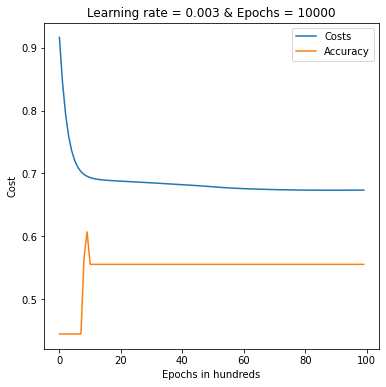

In [61]:
parameters, costs, accuracy = L_layers_model_dropout(X, Y, [4, 10, 7, 5, 1], 0.003, 10000, [1, 0.7, 0.5, 0.8])
plot_cost(costs, accuracy, 0.003, 10000)

Number of Epochs:  20000
Learning rate:  0.003
************************************************************
Cost after epoch 0: 0.9163835691760398
Cost after epoch 100: 0.8452166215925239
Cost after epoch 200: 0.7944852215167835
Cost after epoch 300: 0.7594672098645816
Cost after epoch 400: 0.735846168960295
Cost after epoch 500: 0.7201425611735257
Cost after epoch 600: 0.7097809479383744
Cost after epoch 700: 0.702957127659818
Cost after epoch 800: 0.6984498022960527
Cost after epoch 900: 0.6954492544897947
Cost after epoch 1000: 0.6934251540055715
Cost after epoch 1100: 0.6920325231935958
Cost after epoch 1200: 0.6910477465324621
Cost after epoch 1300: 0.6903260998710389
Cost after epoch 1400: 0.6897739546165346
Cost after epoch 1500: 0.6893307225600451
Cost after epoch 1600: 0.6889571698465814
Cost after epoch 1700: 0.6886278617467434
Cost after epoch 1800: 0.6883262765002832
Cost after epoch 1900: 0.688041644577009
Cost after epoch 2000: 0.6877669105059085
Cost after epoch 2100: 0.

Cost after epoch 19200: 0.6739890970814185
Cost after epoch 19300: 0.6739543710761227
Cost after epoch 19400: 0.6739189958037958
Cost after epoch 19500: 0.6738829875348522
Cost after epoch 19600: 0.6738463625038834
Cost after epoch 19700: 0.673809136951751
Cost after epoch 19800: 0.673771327166328
Cost after epoch 19900: 0.6737329495228075
************************************************************
Elapsed time for the training is:  20.851077556610107
Final Accuracy is: 55.539358600583085%


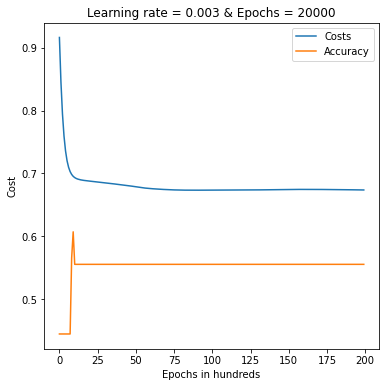

In [62]:
parameters, costs, accuracy = L_layers_model_dropout(X, Y, [4, 10, 7, 5, 1], 0.003, 20000, [1, 0.7, 0.5, 0.8])
plot_cost(costs, accuracy, 0.003, 20000)

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.9163835691760398
Cost after epoch 100: 0.7503431804269972
Cost after epoch 200: 0.7048311347426974
Cost after epoch 300: 0.6933912390028243
Cost after epoch 400: 0.6901159440724898
Cost after epoch 500: 0.6887307047872974
Cost after epoch 600: 0.6877661676025677
Cost after epoch 700: 0.6868743400161007
Cost after epoch 800: 0.6859762951944409
Cost after epoch 900: 0.6850583560641338
Cost after epoch 1000: 0.6840957720595733
Cost after epoch 1100: 0.6830996467591726
Cost after epoch 1200: 0.6821064288541362
Cost after epoch 1300: 0.6810978054522956
Cost after epoch 1400: 0.68001293498189
Cost after epoch 1500: 0.6787739481566913
Cost after epoch 1600: 0.6775632813630946
Cost after epoch 1700: 0.6765939989221508
Cost after epoch 1800: 0.6758619521410361
Cost after epoch 1900: 0.675265895196295
Cost after epoch 2000: 0.6747577914221431
Cost after epoch 2100: 0.6

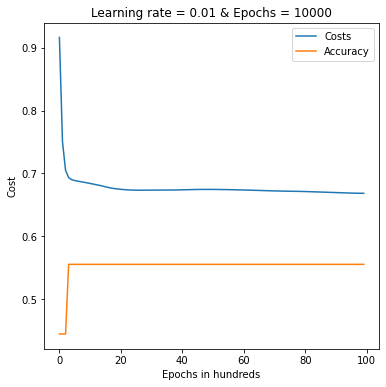

In [63]:
parameters, costs, accuracy = L_layers_model_dropout(X, Y, [4, 10, 7, 5, 1], 0.01, 10000, [1, 0.7, 0.5, 0.8])
plot_cost(costs, accuracy, 0.01, 10000)

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.8884564843017544
Cost after epoch 100: 0.7861143784667658
Cost after epoch 200: 0.749249305076672
Cost after epoch 300: 0.7369676568928601
Cost after epoch 400: 0.7331872443833815
Cost after epoch 500: 0.7318313540597957
Cost after epoch 600: 0.7314822893153313
Cost after epoch 700: 0.7370370275549597
Cost after epoch 800: 0.7436862244994701
Cost after epoch 900: 0.7481224788301187
Cost after epoch 1000: 0.7505808024111353
Cost after epoch 1100: 0.7511197953911235
Cost after epoch 1200: 0.7503220280303022
Cost after epoch 1300: 0.7485665109908302
Cost after epoch 1400: 0.746136347543621
Cost after epoch 1500: 0.7432851289524816
Cost after epoch 1600: 0.7402297344873537
Cost after epoch 1700: 0.7370878006574682
Cost after epoch 1800: 0.7338677797546795
Cost after epoch 1900: 0.7306196481670908
Cost after epoch 2000: 0.727255045260981
Cost after epoch 2100: 0.7

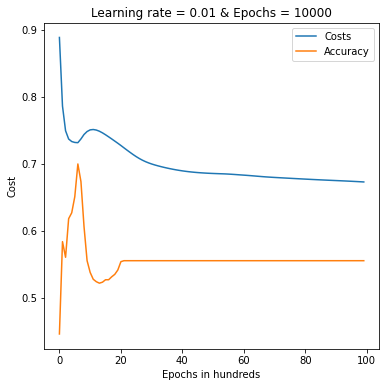

In [64]:
parameters, costs, accuracy = L_layers_model_dropout(X, Y, [4, 14, 10, 6, 1], 0.01, 10000, [1, 0.7, 0.5, 0.8])
plot_cost(costs, accuracy, 0.01, 10000)

### Checking Dropout over train &amp; test sets

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.9546995251618293
Cost after epoch 100: 0.8989616787226404
Cost after epoch 200: 0.8728276532930982
Cost after epoch 300: 0.8569666749314313
Cost after epoch 400: 0.8442237893569077
Cost after epoch 500: 0.8297304533032444
Cost after epoch 600: 0.8110807533753162
Cost after epoch 700: 0.7868120444863264
Cost after epoch 800: 0.7633531748998451
Cost after epoch 900: 0.7501339188467193
Cost after epoch 1000: 0.7393713768110134
Cost after epoch 1100: 0.7287667184187708
Cost after epoch 1200: 0.7173251203715487
Cost after epoch 1300: 0.7052856967253646
Cost after epoch 1400: 0.6959505183239167
Cost after epoch 1500: 0.6914411623101798
Cost after epoch 1600: 0.6885005783984556
Cost after epoch 1700: 0.6862557822667534
Cost after epoch 1800: 0.6844722357105958
Cost after epoch 1900: 0.6830223638486413
Cost after epoch 2000: 0.6818277480147721
Cost after epoch 2100: 

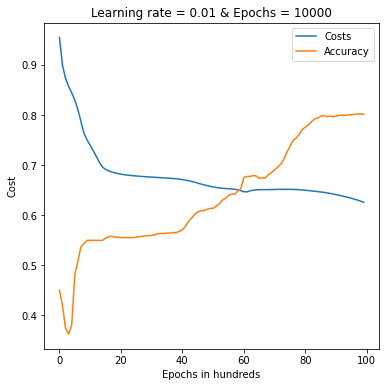

In [65]:
parameters_train, costs_train, accuracy_train = L_layers_model_dropout(X_train, Y_train, [4, 4, 5, 1], 0.01, 10000, [1, 0.7, 0.5])
plot_cost(costs_train, accuracy_train, 0.01, 10000)

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.9510749792801051
Cost after epoch 100: 0.9414397803636251
Cost after epoch 200: 0.9312296261665969
Cost after epoch 300: 0.9217693229302586
Cost after epoch 400: 0.9139912033463444
Cost after epoch 500: 0.9080605147258527
Cost after epoch 600: 0.9036317662850696
Cost after epoch 700: 0.9002381804356252
Cost after epoch 800: 0.8973213608206313
Cost after epoch 900: 0.8942527860837431
Cost after epoch 1000: 0.890521736515452
Cost after epoch 1100: 0.8859168282961396
Cost after epoch 1200: 0.8805006881887317
Cost after epoch 1300: 0.8744488295744905
Cost after epoch 1400: 0.8679161212813785
Cost after epoch 1500: 0.8610052792286955
Cost after epoch 1600: 0.853800272773862
Cost after epoch 1700: 0.8464046087237695
Cost after epoch 1800: 0.8389554081329569
Cost after epoch 1900: 0.8316129921761897
Cost after epoch 2000: 0.8245358898169772
Cost after epoch 2100: 0.

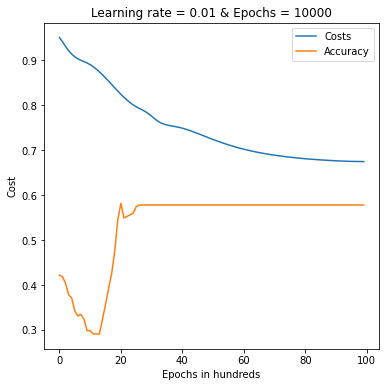

In [66]:
parameters_test, costs_test, accuracy_test = L_layers_model_dropout(X_test, Y_test, [4, 4, 5, 1], 0.01, 10000, [1, 0.7, 0.5])
plot_cost(costs_test, accuracy_test, 0.01, 10000)

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.9371750358170076
Cost after epoch 100: 0.8901788661577312
Cost after epoch 200: 0.8619526828124259
Cost after epoch 300: 0.838447021204934
Cost after epoch 400: 0.8197686999753737
Cost after epoch 500: 0.8031344519990478
Cost after epoch 600: 0.7852352027654261
Cost after epoch 700: 0.7651403048320857
Cost after epoch 800: 0.7453716177888862
Cost after epoch 900: 0.7283838394625726
Cost after epoch 1000: 0.7149128300909405
Cost after epoch 1100: 0.7046585994149723
Cost after epoch 1200: 0.6970385989829607
Cost after epoch 1300: 0.6914799959272218
Cost after epoch 1400: 0.687492367671897
Cost after epoch 1500: 0.6846783774421041
Cost after epoch 1600: 0.6827495516209965
Cost after epoch 1700: 0.6815184754867163
Cost after epoch 1800: 0.680846309412683
Cost after epoch 1900: 0.6805977517304455
Cost after epoch 2000: 0.6806300564425535
Cost after epoch 2100: 0.6

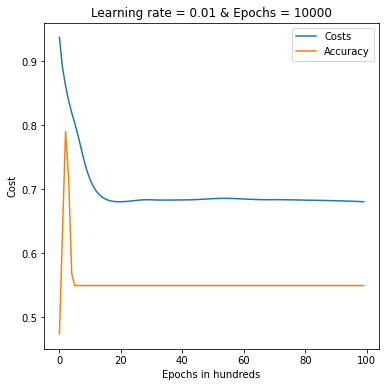

In [67]:
parameters_train, costs_train, accuracy_train = L_layers_model_dropout(X_train, Y_train, [4, 10, 6, 1], 0.01, 10000, [1, 0.7, 0.5])
plot_cost(costs_train, accuracy_train, 0.01, 10000)

Number of Epochs:  10000
Learning rate:  0.01
************************************************************
Cost after epoch 0: 0.9480403969904232
Cost after epoch 100: 0.9362237746822375
Cost after epoch 200: 0.9200938497267922
Cost after epoch 300: 0.903343937573097
Cost after epoch 400: 0.8940118246994508
Cost after epoch 500: 0.8907869381808411
Cost after epoch 600: 0.8886412688711486
Cost after epoch 700: 0.883147346063512
Cost after epoch 800: 0.8769772640048323
Cost after epoch 900: 0.8708887887701804
Cost after epoch 1000: 0.8647998259864911
Cost after epoch 1100: 0.8585222287945455
Cost after epoch 1200: 0.8520027876557966
Cost after epoch 1300: 0.8453233638152013
Cost after epoch 1400: 0.8385459841466859
Cost after epoch 1500: 0.8316835111651655
Cost after epoch 1600: 0.8247174011339953
Cost after epoch 1700: 0.8176315158989654
Cost after epoch 1800: 0.8104570160326438
Cost after epoch 1900: 0.8032652211959737
Cost after epoch 2000: 0.7961355729963056
Cost after epoch 2100: 0.

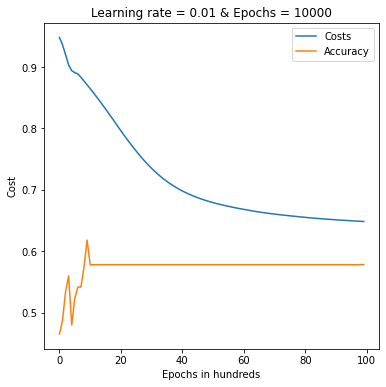

In [68]:
parameters_test, costs_test, accuracy_test = L_layers_model_dropout(X_test, Y_test, [4, 10, 6, 1], 0.01, 10000, [1, 0.7, 0.5])
plot_cost(costs_test, accuracy_test, 0.01, 10000)

--------------------------

**We can see from this last example compared to the same one trained without dropout regularization that dropout helped reduce the overfitting of the training set as the accuracy here on test set is higher than the train set, but in the previous model without dropout the accuracy of the train set was a lot higher than in the test set**

--------------------------

Number of Epochs:  10000
Learning rate:  0.1
************************************************************
Cost after epoch 0: 0.9371750358170076
Cost after epoch 100: 0.7148449351877749
Cost after epoch 200: 0.6806591719968571
Cost after epoch 300: 0.683627520592218
Cost after epoch 400: 0.683306874108081
Cost after epoch 500: 0.6852215835186607
Cost after epoch 600: 0.6849644102928755
Cost after epoch 700: 0.6836512085341881
Cost after epoch 800: 0.682989000225858
Cost after epoch 900: 0.6817952025595082
Cost after epoch 1000: 0.6798348255477928
Cost after epoch 1100: 0.6773090079985971
Cost after epoch 1200: 0.6779162870758444
Cost after epoch 1300: 0.6722676948801636
Cost after epoch 1400: 0.661442829008715
Cost after epoch 1500: 0.6493602923077556
Cost after epoch 1600: 0.6363590624713782
Cost after epoch 1700: 0.6225662462414588
Cost after epoch 1800: 0.6125459862876222
Cost after epoch 1900: 0.6055462391376081
Cost after epoch 2000: 0.5989754086835076
Cost after epoch 2100: 0.592

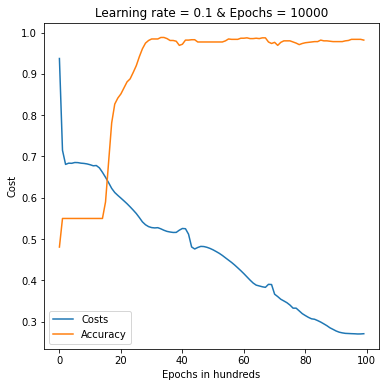

In [69]:
parameters_train, costs_train, accuracy_train = L_layers_model_dropout(X_train, Y_train, [4, 10, 6, 1], 0.1, 10000, [1, 0.7, 0.5])
plot_cost(costs_train, accuracy_train, 0.1, 10000)

Number of Epochs:  10000
Learning rate:  0.1
************************************************************
Cost after epoch 0: 0.9480403969904232
Cost after epoch 100: 0.8646935339570276
Cost after epoch 200: 0.7960898963600662
Cost after epoch 300: 0.734895192349115
Cost after epoch 400: 0.6981339644487111
Cost after epoch 500: 0.6791158177226333
Cost after epoch 600: 0.6680931709398115
Cost after epoch 700: 0.6604269359473756
Cost after epoch 800: 0.6550968152604175
Cost after epoch 900: 0.6511660792942181
Cost after epoch 1000: 0.6481273010354601
Cost after epoch 1100: 0.6431097336126508
Cost after epoch 1200: 0.6404669210014711
Cost after epoch 1300: 0.6369591641947605
Cost after epoch 1400: 0.6341345910072915
Cost after epoch 1500: 0.632817535809138
Cost after epoch 1600: 0.6328593865847539
Cost after epoch 1700: 0.6336587584832982
Cost after epoch 1800: 0.6348588505774121
Cost after epoch 1900: 0.6366395852107821
Cost after epoch 2000: 0.6384113058457282
Cost after epoch 2100: 0.6

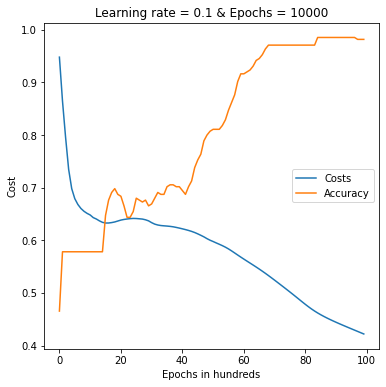

In [70]:
parameters_test, costs_test, accuracy_test = L_layers_model_dropout(X_test, Y_test, [4, 10, 6, 1], 0.1, 10000, [1, 0.7, 0.5])
plot_cost(costs_test, accuracy_test, 0.1, 10000)

---

**In this example also the testing accuracy is higher than the training accuracy**

---

## Using Hellinger Distance as Cost Function

In [71]:
def hellinger(A, Y):

    m = Y.shape[1]

    h = (1/ (m * np.sqrt(2))) * np.sum( np.power((np.sqrt(Y) - np.sqrt(A)), 2) )

    return h


In [72]:
def backward_propagation_L_hellinger(A, Y, parameters, caches):
    
    grads = {}
    L = len(parameters)//2       

    dZ = ( (np.sqrt(A) - np.sqrt(Y)) / (np.sqrt(2) * np.sqrt(A)) ) * (A * (1-A))
    

    for i in reversed(range(L)):
        current_cache = caches[i]     
        A, Z = current_cache          
        grads["dW"+str(i+1)] = (1/m)*np.dot(dZ, A.T) 
        grads["db"+str(i+1)] = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
        grads["dZ"+str(i)] = np.dot(parameters["W"+str(i+1)].T, dZ) * sigmoid_derivative(A)
        dZ = grads["dZ"+str(i)]


    return grads

### L Layers Model with Hellinger Distance as Cost Function

In [73]:
def L_layers_model_hellinger(X, Y, layers_dims, learning_rate, epochs):

    parameters = initialize_parameters_L(layers_dims)
    costs = []
    accuracy = []

    print("Number of Epochs: ", epochs)
    print("Learning rate: ", learning_rate)
    print("*"*60)

    t0 = time.time()

    for i in range(epochs):
    
        A, caches = forward_propagation_L(X, parameters)

        cost = hellinger(A, Y)

        grads = backward_propagation_L_hellinger(A, Y, parameters, caches)
        
        parameters = update_params_L(grads, parameters, learning_rate)

        if i%100 == 0:
            costs.append(cost)
            accuracy.append(compute_accuracy(X, Y, parameters))
            print("Cost after epoch {}: {}".format(i, cost))
    
    t1 = time.time()
    print("*"*60)
    print("Elapsed time for the training is: ",t1-t0)

    
    final_accuracy = compute_accuracy(X, Y, parameters)
    print("Final Accuracy is: {}%".format(final_accuracy * 100))

    return parameters, costs, accuracy

Number of Epochs:  1000
Learning rate:  0.001
************************************************************
Cost after epoch 0: 0.30145026684143195
Cost after epoch 100: 0.30022234820340604
Cost after epoch 200: 0.2989784601351985
Cost after epoch 300: 0.29771875986518137
Cost after epoch 400: 0.2964434313370276
Cost after epoch 500: 0.29515268614156465
Cost after epoch 600: 0.29384676439709306
Cost after epoch 700: 0.29252593556905926
Cost after epoch 800: 0.2911904992196735
Cost after epoch 900: 0.2898407856778482
************************************************************
Elapsed time for the training is:  0.6422405242919922
Final Accuracy is: 44.460641399416915%


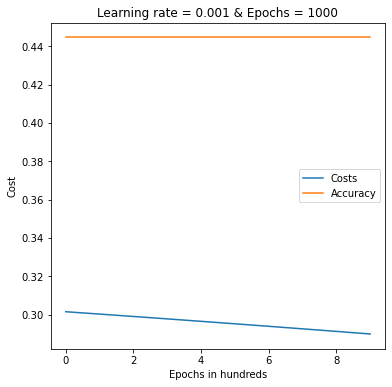

In [74]:
parameters, costs, accuracy = L_layers_model_hellinger(X, Y, [4, 10, 7, 5, 1], 0.001, 1000)
plot_cost(costs,accuracy, 0.001, 1000)

Number of Epochs:  5000
Learning rate:  0.001
************************************************************
Cost after epoch 0: 0.30145026684143195
Cost after epoch 100: 0.30022234820340604
Cost after epoch 200: 0.2989784601351985
Cost after epoch 300: 0.29771875986518137
Cost after epoch 400: 0.2964434313370276
Cost after epoch 500: 0.29515268614156465
Cost after epoch 600: 0.29384676439709306
Cost after epoch 700: 0.29252593556905926
Cost after epoch 800: 0.2911904992196735
Cost after epoch 900: 0.2898407856778482
Cost after epoch 1000: 0.2884771566197002
Cost after epoch 1100: 0.2871000055498193
Cost after epoch 1200: 0.2857097581735815
Cost after epoch 1300: 0.28430687265096993
Cost after epoch 1400: 0.2828918397226795
Cost after epoch 1500: 0.28146518269973125
Cost after epoch 1600: 0.2800274573084075
Cost after epoch 1700: 0.2785792513830481
Cost after epoch 1800: 0.2771211844001265
Cost after epoch 1900: 0.27565390684803964
Cost after epoch 2000: 0.27417809942821214
Cost after ep

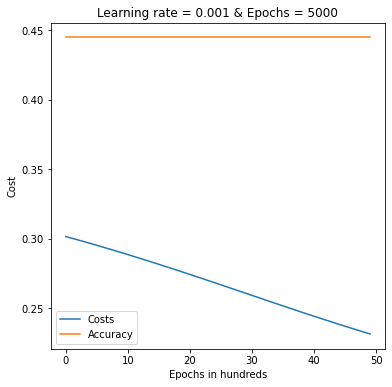

In [75]:
parameters, costs, accuracy = L_layers_model_hellinger(X, Y, [4, 10, 7, 5, 1], 0.001, 5000)
plot_cost(costs,accuracy, 0.001, 5000)

Number of Epochs:  5000
Learning rate:  0.001
************************************************************
Cost after epoch 0: 0.2716714692731854
Cost after epoch 100: 0.27055870351833267
Cost after epoch 200: 0.26944491191404424
Cost after epoch 300: 0.26833046872219707
Cost after epoch 400: 0.26721575168930495
Cost after epoch 500: 0.2661011414345968
Cost after epoch 600: 0.26498702082268755
Cost after epoch 700: 0.26387377432311754
Cost after epoch 800: 0.26276178735914324
Cost after epoch 900: 0.26165144564825366
Cost after epoch 1000: 0.26054313453696304
Cost after epoch 1100: 0.25943723833248783
Cost after epoch 1200: 0.25833413963395413
Cost after epoch 1300: 0.2572342186658073
Cost after epoch 1400: 0.2561378526160947
Cost after epoch 1500: 0.2550454149822757
Cost after epoch 1600: 0.2539572749271824
Cost after epoch 1700: 0.25287379664769255
Cost after epoch 1800: 0.25179533875861226
Cost after epoch 1900: 0.2507222536941683
Cost after epoch 2000: 0.24965488712940817
Cost afte

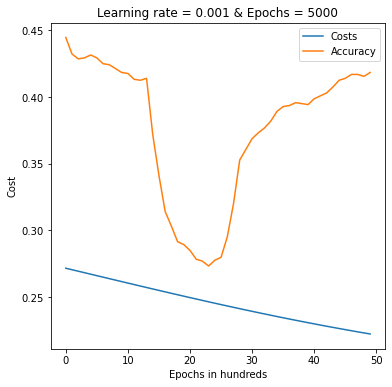

In [76]:
parameters, costs, accuracy = L_layers_model_hellinger(X, Y, [4, 4, 5, 1], 0.001, 5000)
plot_cost(costs,accuracy, 0.001, 5000)

**Using Hellinger as a cost function worked to lower the cost, but the weird behaviour of the accuracy & the decreasing cost starting around 0.3 needs further experimentation & analysis**